In [1]:
from IPython.display import HTML
HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
To toggle on/off the underlying python code, click <a href="javascript:code_toggle()">here</a>.''')

# Import modules
- Pandas is third party: Defines dataframe data structure
- os is in standard library

In [2]:
import pandas as pd
import os

# Load Data
- Data is stored in .csv file in data directory

In [6]:
import feather
DATA_DIR = os.path.join(os.getcwd(), os.pardir, 'data')
feather_name = os.path.join(DATA_DIR, "iris.data")
iris_df = feather.read_dataframe(feather_name)
iris_df.head()

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [3]:
# DATA_DIR = os.path.join(os.getcwd(), os.pardir, 'data')
# iris_df = pd.read_csv(os.path.join(DATA_DIR, 'iris.data'))
# iris_df.head()

,sepal_len,sepal_width,petal_len,petal_width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


# Inspect Data

- pandas offers descriptive stats for numerical columns
- show describe method on full data set

In [4]:
iris_df.describe()

,sepal_len,sepal_width,petal_len,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


## Calculate Stats by Species
- indexed by species and statistic for simple lookup

In [5]:
def describe_all(iris_df):
    ''' return descriptive stats dataframe by species and stat'''
    df_list = list()
    for species in iris_df['class'].unique():
        species_subset = iris_df[iris_df['class'] == species].describe()
        species_subset['class'] = species
        df_list.append(species_subset)
        
    return pd.concat(df_list).reset_index().rename(columns={'index':'stat'}).set_index(['class', 'stat'])


descriptive_stats = describe_all(iris_df)
descriptive_stats

sepal_len  sepal_width  petal_len  petal_width
class           stat                                                 
Iris-setosa     count  50.000000    50.000000  50.000000    50.000000
                mean    5.006000     3.418000   1.464000     0.244000
                std     0.352490     0.381024   0.173511     0.107210
                min     4.300000     2.300000   1.000000     0.100000
                25%     4.800000     3.125000   1.400000     0.200000
                50%     5.000000     3.400000   1.500000     0.200000
                75%     5.200000     3.675000   1.575000     0.300000
                max     5.800000     4.400000   1.900000     0.600000
Iris-versicolor count  50.000000    50.000000  50.000000    50.000000
                mean    5.936000     2.770000   4.260000     1.326000
                std     0.516171     0.313798   0.469911     0.197753
                min     4.900000     2.000000   3.000000     1.000000
                25%     5.600000     2.525000   4.000000     1.200000
                50%     5.900000     2.800000   4.350000     1.300000
                75%     6.300000     3.000000   4.600000     1.500000
                max     7.000000     3.400000   5.100000     1.800000
Iris-virginica  count  50.000000    50.000000  50.000000    50.000000
                mean    6.588000     2.974000   5.552000     2.026000
                std     0.635880     0.322497   0.551895     0.274650
                min     4.900000     2.200000   4.500000     1.400000
                25%     6.225000     2.800000   5.100000     1.800000
                50%     6.500000     3.000000   5.550000     2.000000
                75%     6.900000     3.175000   5.875000     2.300000
                max     7.900000     3.800000   6.900000     2.500000

# indexing location
- demonstrate how multi index helps organize data

In [6]:
descriptive_stats.loc[('Iris-virginica','std'),'petal_width']

0.27465005563666739

In [7]:
descriptive_stats.loc[('Iris-virginica',['min', 'max']),:]

sepal_len  sepal_width  petal_len  petal_width
class          stat                                                
Iris-virginica min         4.9          2.2        4.5          1.4
               max         7.9          3.8        6.9          2.5

# Calculate area
- pretend surface are of petal, sepal can be approximated as rectangle area

In [8]:
iris_df['sepal_area'] = iris_df['sepal_len'] * iris_df['sepal_width']
iris_df['petal_area'] = iris_df['petal_len'] * iris_df['petal_width']
iris_df.head()

,sepal_len,sepal_width,petal_len,petal_width,class,sepal_area,petal_area
0,5.1,3.5,1.4,0.2,Iris-setosa,17.85,0.28
1,4.9,3.0,1.4,0.2,Iris-setosa,14.70,0.28
2,4.7,3.2,1.3,0.2,Iris-setosa,15.04,0.26
3,4.6,3.1,1.5,0.2,Iris-setosa,14.26,0.30
4,5.0,3.6,1.4,0.2,Iris-setosa,18.00,0.28


# Calculate largest flower species by average area

In [9]:
mean_area = iris_df.loc[:,['class', 'sepal_area', 'petal_area']].groupby('class').mean()
mean_area.sort_values('sepal_area', ascending=False)

,sepal_area,petal_area
class,,
Iris-virginica,19.6846,11.2962
Iris-setosa,17.2088,0.3628
Iris-versicolor,16.5262,5.7204


In [10]:
mean_area.sort_values('petal_area', ascending=False)

,sepal_area,petal_area
class,,
Iris-virginica,19.6846,11.2962
Iris-versicolor,16.5262,5.7204
Iris-setosa,17.2088,0.3628


# Use Feather format to share dataframes between R & pandas
- This is incredible! 
- https://blog.rstudio.com/2016/03/29/feather/

# Visualization

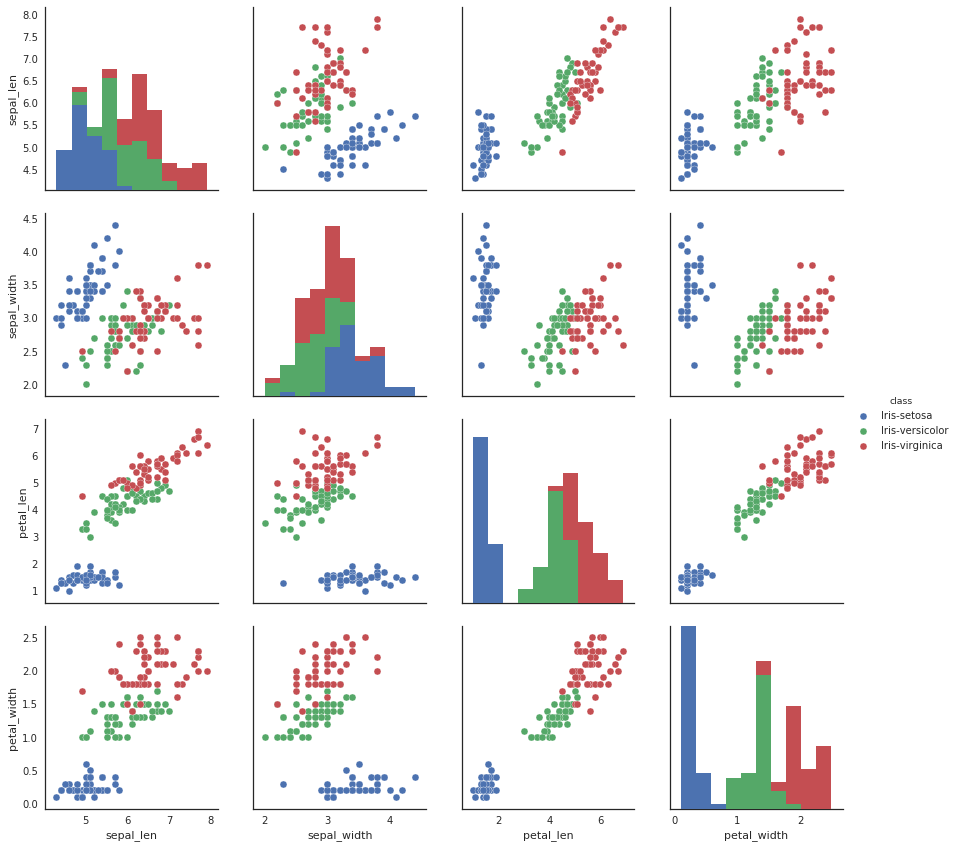

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.set(style="white", color_codes=True)
sns.pairplot(iris_df[['sepal_len', 'sepal_width', 'petal_len', 'petal_width', 'class']], hue='class', size=3)
plt.show()